#**Losing Bank Customers**




##**About Case Study:**
The case study focuses on a Multinational Bank, which aims to enhance its customer retention strategies. With access to customer data, including demographics, financial behaviors, and satisfaction metrics, the bank seeks to uncover patterns and insights to improve customer retention and sustain its business.

##**Business Problem**:
A Multinational Bank faces the challenge of retaining customers in a competitive banking landscape. Customer churn, dissatisfaction, and unresolved complaints pose risks to the bank's profitability and reputation. Understanding the factors contributing to churn and dissatisfaction is crucial for implementing effective retention strategies.

##**Objective**:
This case study aims to analyze customer data from a Multinational Bank to:

- Identify factors influencing customer churn rates.
- Assess the impact of demographic variables (such as geography, gender, age) and banking behaviors (such as credit score, balance, number of products) on churn rates.
- Evaluate customer satisfaction scores, complaint resolutions, and loyalty program participation to pinpoint areas for service improvement.
- Develop data-driven insights and recommendations to enhance customer retention strategies and sustain the bank's business growth.

####**Importing Libraries**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency



####**Downloading and Assigning Dataset**

In [2]:
#Downloading Dataset
!gdown 1iP0JGPcdnWPHehILYRmJHQcyCmsgzSTO

Downloading...
From: https://drive.google.com/uc?id=1iP0JGPcdnWPHehILYRmJHQcyCmsgzSTO
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 109MB/s]


In [3]:
#Assigning Dataset
df = pd.read_csv("Bank-Records.csv")

In [4]:
#Displaying head of the Dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


####**Understanding Dataset**

In [5]:
#Displaying missing percentage
round(df.isna().sum()/ len(df),2)

RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
dtype: float64

In [6]:
#Size of dataset
df.size

180000

In [7]:
#Shape of Dataset
df.shape

(10000, 18)

In [8]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [9]:
#Unique Values
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

####**Summary Statistics**

In [10]:
#Displaying statistical values of numerical datatype
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
#Displaying statistical values of object datatype
df.describe(include = 'object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


####**Converting Continuous Numerical Variables into Categorical Variables**

In [12]:
#Creating bins for Age column
bins = [17,30,45,float('inf')]
labels = ['Adult', 'Middle Aged', 'Old Aged']

# Create the 'Age Group' column based on the bins and labels
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age Group'].value_counts()

Age Group
Middle Aged    6019
Old Aged       2340
Adult          1641
Name: count, dtype: int64

In [13]:
#Creating bins for CreditScore column
bins = [0, 579, 669, 730, 799, float('inf')]
labels = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

# Create the 'CreditScore Category' column based on the bins and labels
df['CreditScore Category'] = pd.cut(df['CreditScore'], bins=bins, labels=labels, right=False)
df['CreditScore Category'].value_counts()

CreditScore Category
Fair         3332
Very Poor    2325
Good         2192
Very Good    1484
Excellent     667
Name: count, dtype: int64

In [14]:
#Creating bins for Point Earned column
bins = [0, 200, 400, 600, 800, float('inf')]
labels = ['<=200', '<=400', '<=600', '<=800', '>800']

# Create the 'Point Earned Category' column based on the bins and labels
df['Point Earned Category'] = pd.cut(df['Point Earned'], bins=bins, labels=labels, right=False)
df['Point Earned Category'].value_counts()

Point Earned Category
<=600    2588
<=800    2555
>800     2512
<=400    2343
<=200       2
Name: count, dtype: int64

##**Data Visualization**

####**Correlation Analysis**

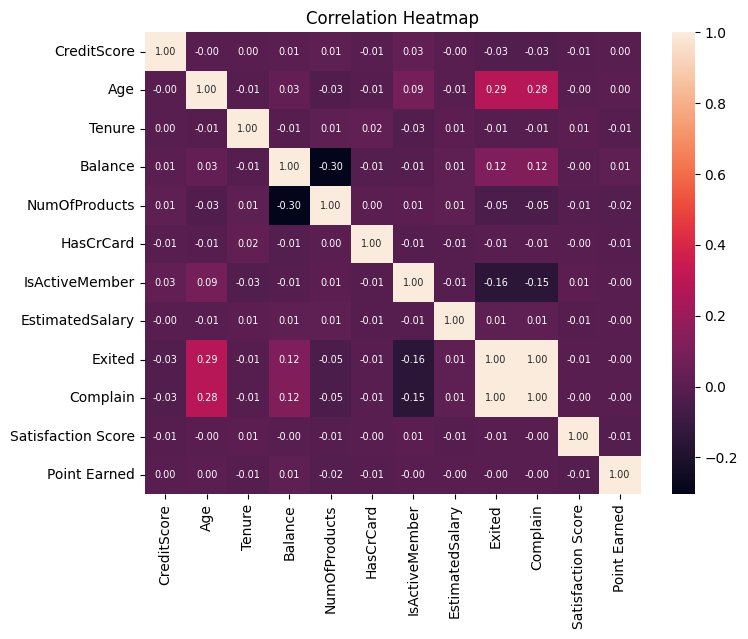

In [15]:
# Compute the correlation matrix
corr_matrix = df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary",
                  "Exited", "Complain", "Satisfaction Score", "Point Earned"]]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.corr(), annot=True, fmt=".2f",annot_kws={"fontsize": 7} )
plt.title('Correlation Heatmap')
plt.savefig('Correlation Heatmap.png')
plt.show()

##**Univariate Analysis**

####**Distribution of Continuous Variables**

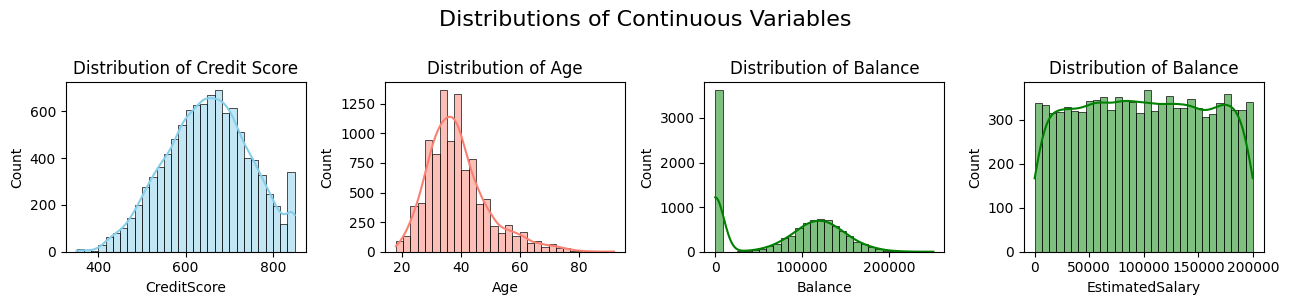

In [16]:
# Visualize the distribution of variables: credit score, age, and balance
plt.figure(figsize=(13, 3))

plt.subplot(1, 4, 1)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Credit Score')

plt.subplot(1, 4, 2)
sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Age')

plt.subplot(1, 4, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='green')
plt.title('Distribution of Balance')

plt.subplot(1, 4, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='green')
plt.title('Distribution of Balance')

plt.suptitle("Distributions of Continuous Variables",fontsize=16, y = 1)

plt.savefig("Distributions of continuous variable.png")

plt.tight_layout()
plt.show()


####**Distribution of Categorical Variables**

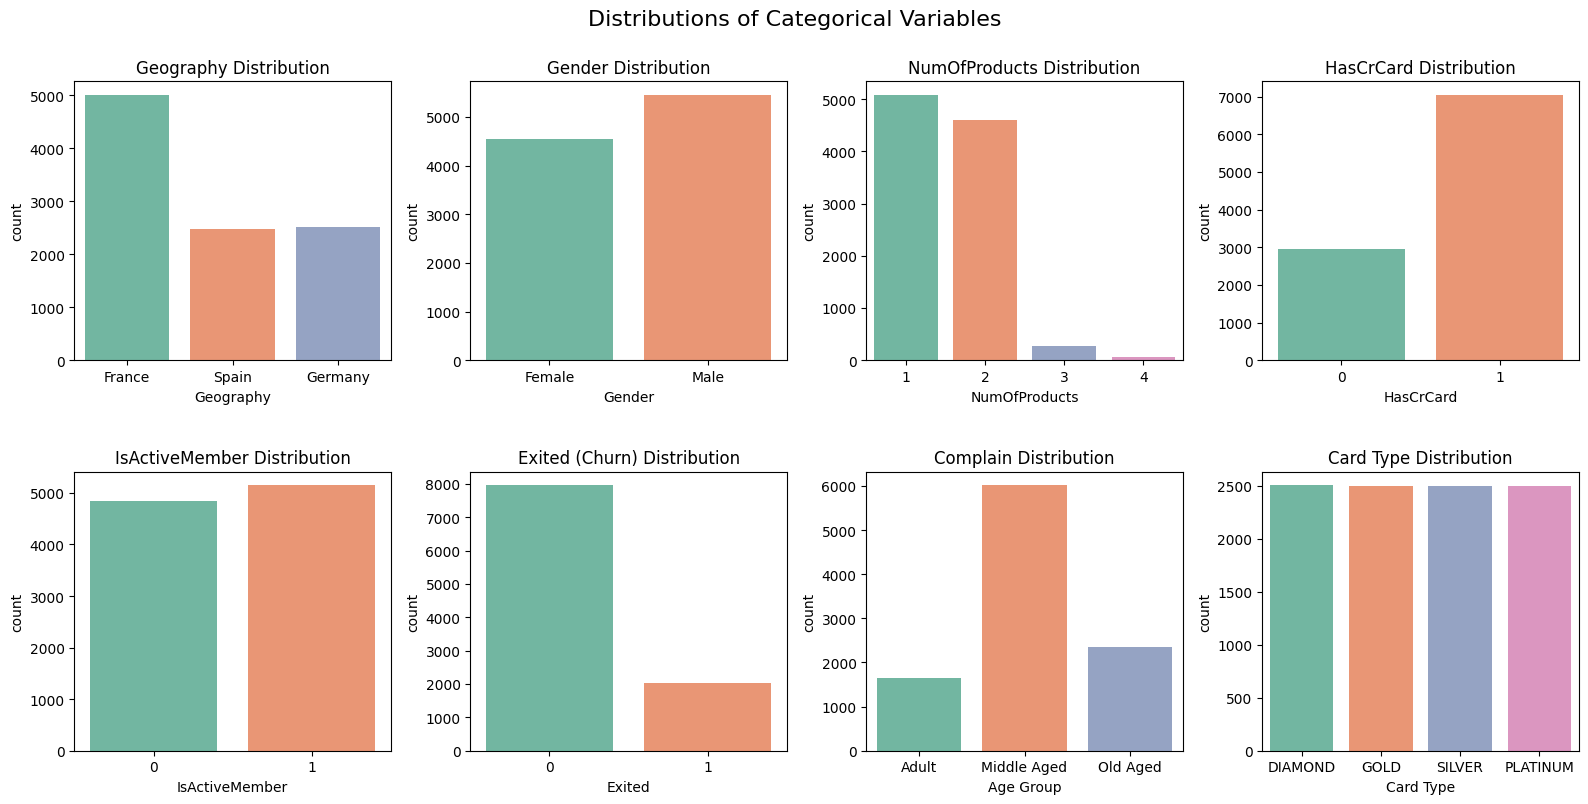

In [17]:
# Set up the figure and axes
plt.figure(figsize=(16, 8))

# Bar plots for Geography distributions
plt.subplot(2,4,1)
sns.countplot(x='Geography', data=df, palette='Set2')
plt.title('Geography Distribution')

# Bar plots for Gender distributions
plt.subplot(2,4,2)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')

# Bar plots for NumOfProducts distributions
plt.subplot(2,4,3)
sns.countplot(x='NumOfProducts', data=df, palette='Set2')
plt.title('NumOfProducts Distribution')

# Bar plots for HasCrCard distributions
plt.subplot(2,4,4)
sns.countplot(x='HasCrCard', data=df, palette='Set2')
plt.title('HasCrCard Distribution')

# Bar plots for IsActiveMember distributions
plt.subplot(2,4,5)
sns.countplot(x='IsActiveMember', data=df, palette='Set2')
plt.title('IsActiveMember Distribution')

# Bar plots for Exited distributions
plt.subplot(2,4,6)
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Exited (Churn) Distribution')

# Bar plots for Age Group distributions
plt.subplot(2,4,7)
sns.countplot(x='Age Group', data=df, palette='Set2')
plt.title('Complain Distribution')

# Bar plots for Card Type distributions
plt.subplot(2,4,8)
sns.countplot(x='Card Type', data=df, palette='Set2')
plt.title('Card Type Distribution')

plt.suptitle("Distributions of Categorical Variables", fontsize=16, y = 1)

# Adjust layout
plt.savefig("Distributions of categorical variable.png")
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)

plt.show()


####**Proportion Distribution**

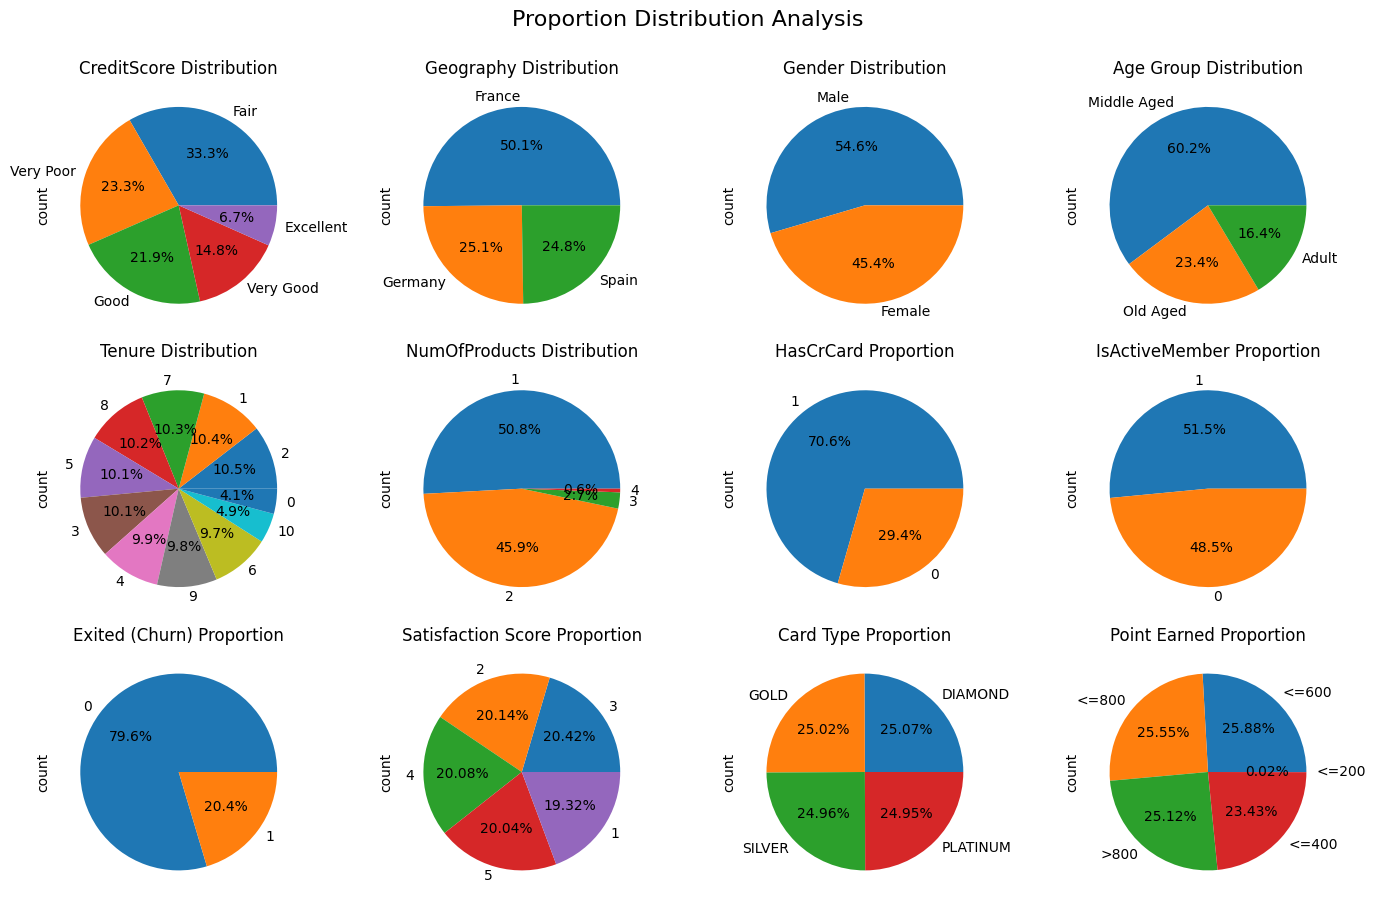

In [19]:
# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(14, 9))

# Pie charts for specified distributions
df['CreditScore Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 0])
axs[0, 0].set_title('CreditScore Distribution')

df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 1])
axs[0, 1].set_title('Geography Distribution')

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 2])
axs[0, 2].set_title('Gender Distribution')

df['Age Group'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0, 3])
axs[0, 3].set_title('Age Group Distribution')

df['Tenure'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 0])
axs[1, 0].set_title('Tenure Distribution')

df['NumOfProducts'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 1])
axs[1, 1].set_title('NumOfProducts Distribution')

df['HasCrCard'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 2])
axs[1, 2].set_title('HasCrCard Proportion')

df['IsActiveMember'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[1, 3])
axs[1, 3].set_title('IsActiveMember Proportion')

df['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[2, 0])
axs[2, 0].set_title('Exited (Churn) Proportion')

df['Satisfaction Score'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axs[2, 1])
axs[2, 1].set_title('Satisfaction Score Proportion')

df['Card Type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axs[2, 2])
axs[2, 2].set_title('Card Type Proportion')

df['Point Earned Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axs[2, 3])
axs[2, 3].set_title('Point Earned Proportion')

fig.suptitle("Proportion Distribution Analysis", fontsize=16, y = 1)

plt.subplots_adjust(wspace=0.3)  # Adjust horizontal space

plt.savefig("Proportion Distribution.png")
# Adjust layout
plt.tight_layout()
plt.show()


##**Bivariate Analysis**

####Heatmap

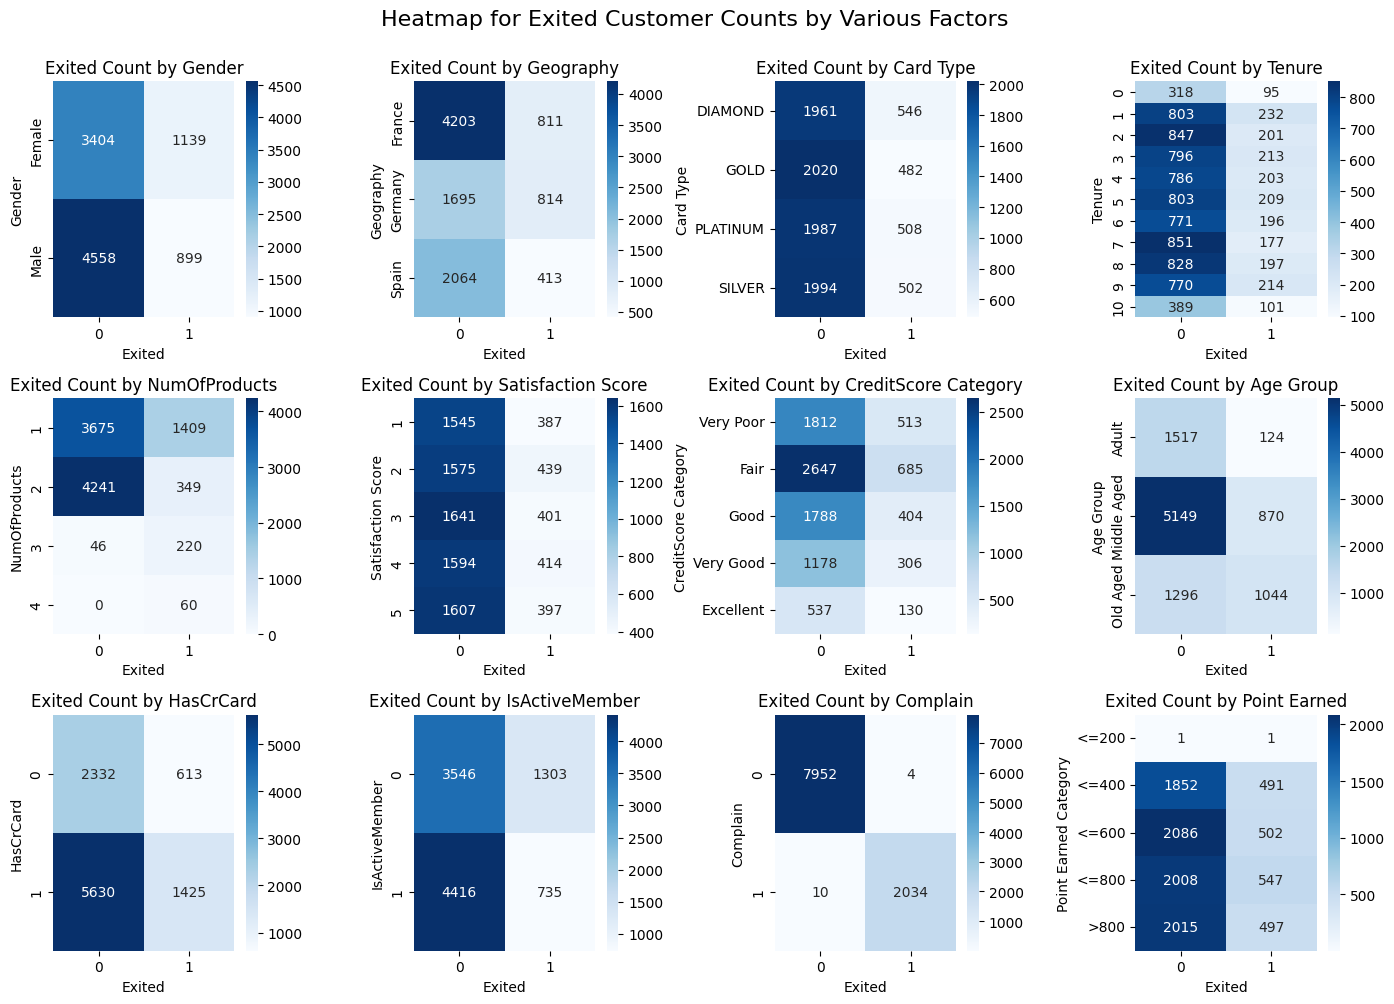

In [20]:
# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(14, 10))

# Function to create heatmap
def create_heatmap(groupby_cols, title, ax):
    pivot_table = df.pivot_table(index=groupby_cols, columns='Exited', aggfunc='size', fill_value=0)
    sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Exited')
    ax.set_ylabel(groupby_cols)

# Heatmaps for Exited count by different factors
create_heatmap('Gender', 'Exited Count by Gender', axs[0, 0])
create_heatmap('Geography', 'Exited Count by Geography', axs[0, 1])
create_heatmap('Card Type', 'Exited Count by Card Type', axs[0, 2])
create_heatmap('Tenure', 'Exited Count by Tenure', axs[0, 3])
create_heatmap('NumOfProducts', 'Exited Count by NumOfProducts', axs[1, 0])
create_heatmap('Satisfaction Score', 'Exited Count by Satisfaction Score', axs[1, 1])
create_heatmap('CreditScore Category', 'Exited Count by CreditScore Category', axs[1, 2])
create_heatmap('Age Group', 'Exited Count by Age Group', axs[1, 3])
create_heatmap('HasCrCard', 'Exited Count by HasCrCard', axs[2, 0])
create_heatmap('IsActiveMember', 'Exited Count by IsActiveMember', axs[2, 1])
create_heatmap('Complain', 'Exited Count by Complain', axs[2, 2])
create_heatmap('Point Earned Category', 'Exited Count by Point Earned', axs[2, 3])

plt.savefig("Heatmap for Exited.png")
fig.suptitle("Heatmap for Exited Customer Counts by Various Factors", fontsize=16, y=1)

plt.subplots_adjust(top=0.9, hspace=0.8)

# Adjust layout
plt.tight_layout()
plt.show()


####Stacked Bar Chart

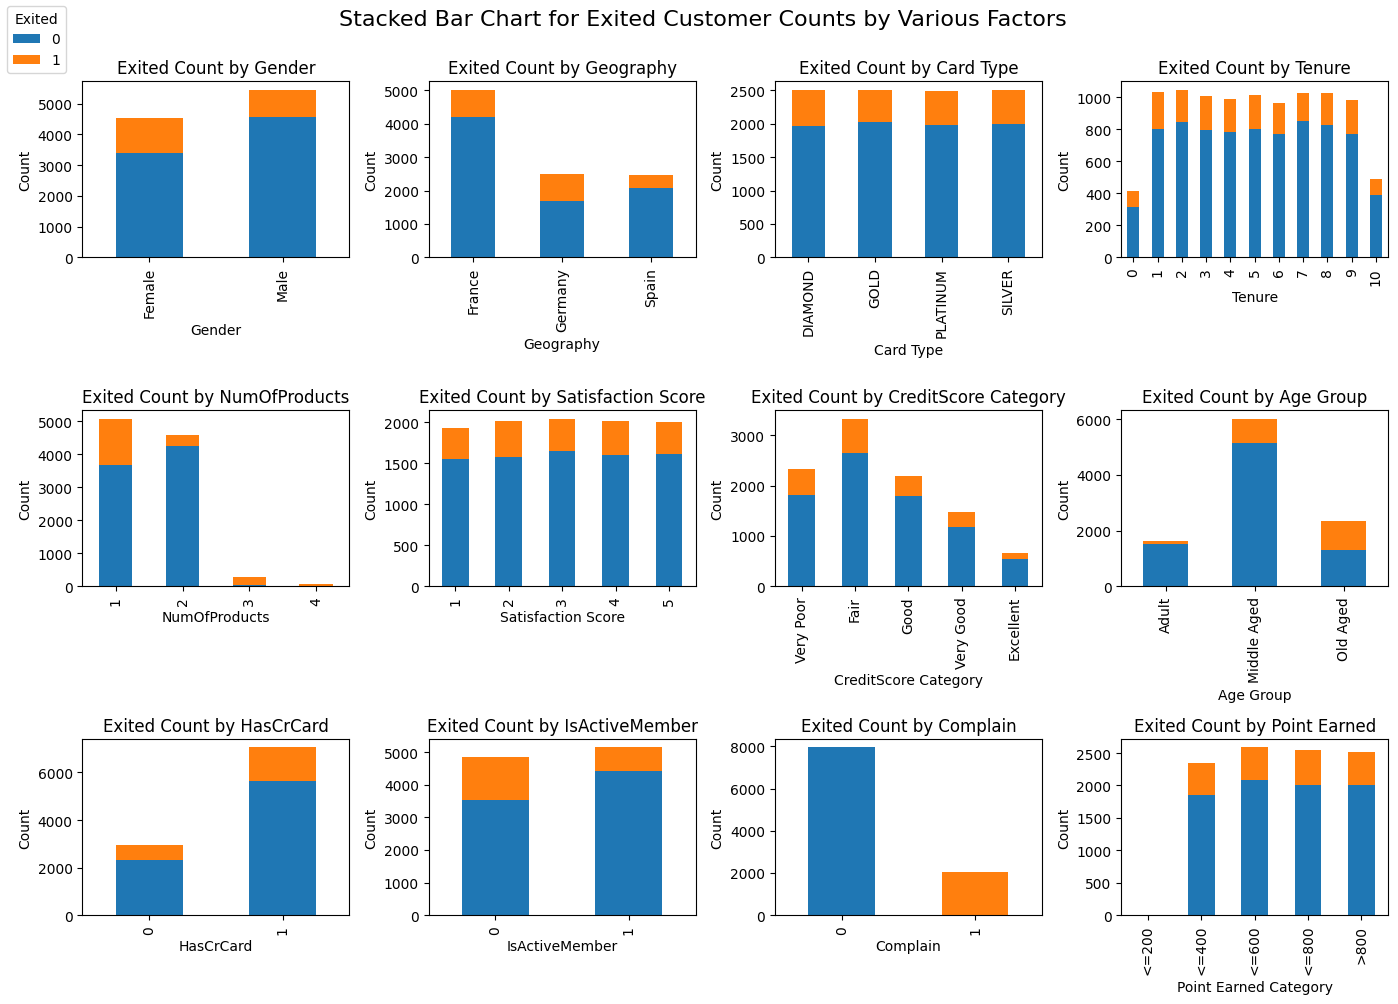

In [21]:
# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(14, 10))

# Function to create stacked bar charts
def create_stacked_bar_chart(groupby_cols, title, ax):
    df.groupby(groupby_cols)['Exited'].value_counts().unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(groupby_cols)
    ax.set_ylabel('Count')
    ax.legend().remove()  # Remove individual legend for each subplot

# Stacked bar charts for Exited count by different factors
create_stacked_bar_chart('Gender', 'Exited Count by Gender', axs[0, 0])
create_stacked_bar_chart('Geography', 'Exited Count by Geography', axs[0, 1])
create_stacked_bar_chart('Card Type', 'Exited Count by Card Type', axs[0, 2])
create_stacked_bar_chart('Tenure', 'Exited Count by Tenure', axs[0, 3])
create_stacked_bar_chart('NumOfProducts', 'Exited Count by NumOfProducts', axs[1, 0])
create_stacked_bar_chart('Satisfaction Score', 'Exited Count by Satisfaction Score', axs[1, 1])
create_stacked_bar_chart('CreditScore Category', 'Exited Count by CreditScore Category', axs[1, 2])
create_stacked_bar_chart('Age Group', 'Exited Count by Age Group', axs[1, 3])
create_stacked_bar_chart('HasCrCard', 'Exited Count by HasCrCard', axs[2, 0])
create_stacked_bar_chart('IsActiveMember', 'Exited Count by IsActiveMember', axs[2, 1])
create_stacked_bar_chart('Complain', 'Exited Count by Complain', axs[2, 2])
create_stacked_bar_chart('Point Earned Category', 'Exited Count by Point Earned', axs[2, 3])

# Add a legend for the entire figure
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', title='Exited')
plt.savefig("Stacked chart for Exited.png")
fig.suptitle("Stacked Bar Chart for Exited Customer Counts by Various Factors", fontsize=16, y = 1)

plt.subplots_adjust(top = 0.9, hspace=0.8)


# Adjust layout
plt.tight_layout()
plt.show()


##**Multivariate Analysis**

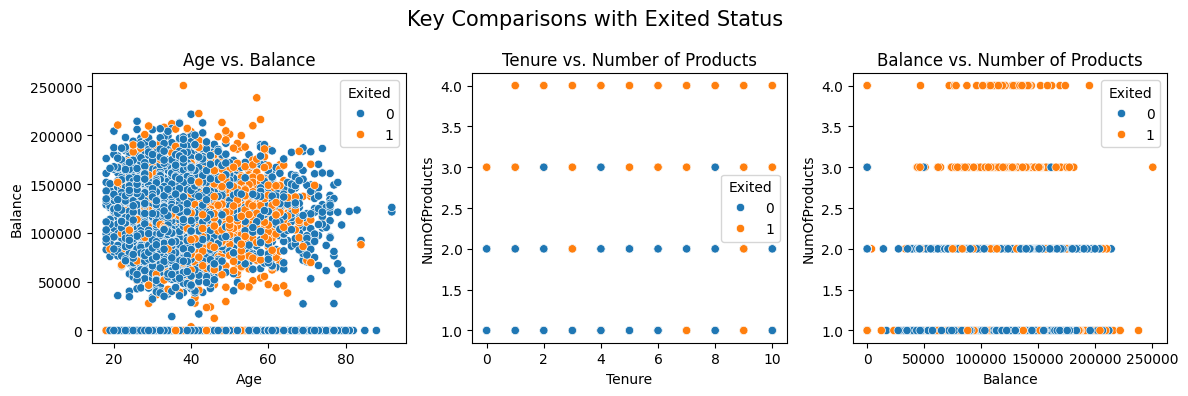

In [22]:
# Set up the figure and axes
fig, axs = plt.subplots(1,3, figsize=(12, 4))

# Scatter plots for specified comparisons
sns.scatterplot(x='Age', y='Balance', data=df, ax=axs[0], hue = 'Exited')
axs[0].set_title('Age vs. Balance')

sns.scatterplot(x='Tenure', y='NumOfProducts', hue='Exited', data=df, ax = axs[1])
axs[1].set_title('Tenure vs. Number of Products')

sns.scatterplot(x='Balance', y='NumOfProducts', hue='Exited', data=df, ax = axs[2])
axs[2].set_title('Balance vs. Number of Products')

plt.savefig("scatterplot.png")

plt.suptitle("Key Comparisons with Exited Status", fontsize = 15)

plt.tight_layout()
plt.show()

##**Statistical Testing**

### **Hypothesis Testing:**

#### Performing Hypothesis Testing on the relevent columns to assess whether observed differences or relationships in data are statistically significant or not.


In [23]:
alpha = 0.05
H0 = "There is no significant difference in credit scores between exited and not-exited customers"
H1 = "There is significant difference in credit scores between exited and not-exited customers"

# Extract balance data for churned and non-churned customers
credit_score_churned = df[df['Exited'] == 1]['CreditScore']
credit_score_not_churned = df[df['Exited'] == 0]['CreditScore']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(credit_score_churned, credit_score_not_churned)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in credit scores between exited and not-exited customers.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in credit scores between exited and not-exited customers.")


Reject Null Hypothesies. There is significant difference in credit scores between exited and not-exited customers.


In [24]:
alpha = 0.05
H0 = "There is no significant difference in Demographic factor (Geography) between exited and not-exited customers"
H1 = "There is significant difference in Demographic factor (Geography) between exited and not-exited customers"

# Create a contingency table
geo_exited_crosstab = pd.crosstab(df['Geography'], df['Exited'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(geo_exited_crosstab)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in Demographic factor (Geography) between exited and not-exited customers.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in Demographic factor (Geography) between exited and not-exited customers.")



Reject Null Hypothesies. There is significant difference in Demographic factor (Geography) between exited and not-exited customers.


In [25]:
alpha = 0.05
H0 = "There is no significant difference in Demographic factor (Gender) between exited and not-exited customers"
H1 = "There is significant difference in Demographic factor (Gender) between exited and not-exited customers"

# Create a contingency table
gen_exited_crosstab = pd.crosstab(df['Gender'], df['Exited'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(gen_exited_crosstab)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in Demographic factor (Gender) between exited and not-exited customers.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in Demographic factor (Gender) between exited and not-exited customers.")



Reject Null Hypothesies. There is significant difference in Demographic factor (Gender) between exited and not-exited customers.


In [26]:
alpha = 0.05
H0 = "There is no significant difference in Demographic factor (Age) between exited and not-exited customers"
H1 = "There is significant difference in Demographic factor (Age) between exited and not-exited customers"

# Extract Age data for churned and non-churned customers
Age_churned = df[df['Exited'] == 1]['Age']
Age_not_churned = df[df['Exited'] == 0]['Age']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(Age_churned, Age_not_churned)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in Demographic factor (Age) between exited and not-exited customers.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in Demographic factor (Age) between exited and not-exited customers.")


Reject Null Hypothesies. There is significant difference in Demographic factor (Age) between exited and not-exited customers.


In [27]:
alpha = 0.05
H0 = "There is no significant difference in churn rates among people with different tenures."
H1 = "There is significant difference in churn rates among people with different tenures."

# Extract tenure data for churned and non-churned customers
tenure_churned = df[df['Exited'] == 1]['Tenure']
tenure_not_churned = df[df['Exited'] == 0]['Tenure']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(tenure_churned, tenure_not_churned)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in churn rates among people with different tenures.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in churn rates among people with different tenures.")


Failed to reject Null Hypothesis. There is no significant difference in churn rates among people with different tenures.


In [28]:
alpha = 0.05
H0 = "There is no significant difference in churn rates among people with different bank balances."
H1 = "There is significant difference in churn rates among people with different bank balances."

# Extract balance data for churned and non-churned customers
balance_churned = df[df['Exited'] == 1]['Balance']
balance_not_churned = df[df['Exited'] == 0]['Balance']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(balance_churned, balance_not_churned)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. There is significant difference in churn rates among people with different bank balances.")
else:
  print("Failed to reject Null Hypothesis. There is no significant difference in churn rates among people with different bank balances.")

Reject Null Hypothesies. There is significant difference in churn rates among people with different bank balances.


In [29]:
alpha = 0.05
H0 = "The number of products held by customers has no significant impact on churn rates."
H1 = "The number of products held by customers has a significant impact on churn rates."

# Create a contingency table
prod_exited_crosstab = pd.crosstab(df['NumOfProducts'], df['Exited'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(prod_exited_crosstab)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies. The number of products held by customers has a significant impact on churn rates.")
else:
  print("Failed to reject Null Hypothesis. The number of products held by customers has no significant impact on churn rates.")

Reject Null Hypothesies. The number of products held by customers has a significant impact on churn rates.


In [30]:
alpha = 0.05
H0 =  "There is no significant difference in churn rates between people who have a credit card and those who do not."
H1 =  "There is significant difference in churn rates between people who have a credit card and those who do not."

# Create a contingency table
card_exited_crosstab = pd.crosstab(df['HasCrCard'], df['Exited'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(card_exited_crosstab)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in churn rates between people who have a credit card and those who do not.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in churn rates between people who have a credit card and those who do not.")

Failed to reject Null Hypothesis.There is no significant difference in churn rates between people who have a credit card and those who do not.


In [31]:
alpha = 0.05
H0 =  "There is no significant difference in churn rates between active customers and inactive customers."
H1 =  "There is significant difference in churn rates between active customers and inactive customers."

# Create a contingency table
active_exited_crosstab = pd.crosstab(df['IsActiveMember'], df['Exited'])

# Perform chi-square test
chi2, p_val, _, _ = chi2_contingency(active_exited_crosstab)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in churn rates between active customers and inactive customers.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in churn rates between active customers and inactive customers.")

Reject Null Hypothesies.There is significant difference in churn rates between active customers and inactive customers.


In [32]:
alpha = 0.05
H0 =  "There is no significant difference in churn rates among people with different estimated salaries."
H1 =  "There is significant difference in churn rates among people with different estimated salaries."

# Separate estimated salary for churned and not churned customers
salary_churned = df[df['Exited'] == 1]['EstimatedSalary']
salary_not_churned = df[df['Exited'] == 0]['EstimatedSalary']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(salary_churned, salary_not_churned, equal_var=False)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in churn rates among people with different estimated salaries.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in churn rates among people with different estimated salaries.")

Failed to reject Null Hypothesis.There is no significant difference in churn rates among people with different estimated salaries.


In [33]:
alpha = 0.05
H0 =  "There is no significant difference in churn rates among people with difference satisfaction scores."
H1 =  "There is significant difference in churn rates among people with difference satisfaction scores."


# Separate satisfaction scores for churned and not churned customers
satisfaction_churned = df[df['Exited'] == 1]['Satisfaction Score']
satisfaction_not_churned = df[df['Exited'] == 0]['Satisfaction Score']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(satisfaction_churned, satisfaction_not_churned, equal_var=False)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in churn rates among people with difference satisfaction scores.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in churn rates among people with difference satisfaction scores.")

Failed to reject Null Hypothesis.There is no significant difference in churn rates among people with difference satisfaction scores.


In [34]:
alpha = 0.05
H0 =  "There is no significant difference in churn rates among customers with different card type."
H1 =  "There is significant difference in churn rates among customers with different card type."

# Create a contingency table
card_exited_crosstab = pd.crosstab(df['Card Type'], df['Exited'])

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in churn rates among customers with different card type.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in churn rates among customers with different card type.")

Failed to reject Null Hypothesis.There is no significant difference in churn rates among customers with different card type.


In [35]:
alpha = 0.05
H0 =  "There is no significant difference in points earned between exited and not-exited customers."
H1 =  "There is significant difference in points earned between exited and not-exited customers."

# Separate point earned for churned and not churned customers
point_churned = df[df['Exited'] == 1]['Point Earned']
point_not_churned = df[df['Exited'] == 0]['Point Earned']

# Perform two-sample t-test
t_stat, p_val = ttest_ind(point_churned, point_not_churned, equal_var=False)

# Print results
if alpha > p_val:
  print("Reject Null Hypothesies.There is significant difference in points earned between exited and not-exited customers.")
else:
  print("Failed to reject Null Hypothesis.There is no significant difference in points earned between exited and not-exited customers.")

Failed to reject Null Hypothesis.There is no significant difference in points earned between exited and not-exited customers.


#**Recommendations :**
1. **Credit Score** - There are **23%** customers who falls in Very Poor category,  **15%** falls in Fair, , **22%** falls in Good,, **33%** very Good and **7%** customer falls in Excellent category. By performing hypothesis testing, we concluded customers who are having good credit score are less likely to churn comparetively who are having less credit score. The reason may be customers who are not able to maintain good credit score and closing the bank account. To overcome with this problem bank can implement some recommendation to educate customers to maintain good credit score. Some of them are :
* Creating targeted marketing campaigns or financial education programs to help customers improve and maintain their credit scores.
* Recommending personalized offers or rewards for customers with good credit scores to incentivize loyalty.

2. **Geography** - There are **50%** Customers are from France and **25%** from Germany & **25%** Customers Spain. However, Customer from Germany are more likely to leave bank accounts than Spain & France. Some recommendations for bank to ovecome with this problem are:
* The bank should offer personalized incentives, improved customer support services, or targeted marketing campaigns designed to address the unique challenges faced by customers in Germany.  
* This may involve collecting additional data through surveys, interviews, or customer feedback to identify underlying reasons for dissatisfaction or attrition.

3. **Gender** - Proportion of Male and Female are **55%** and **45%** resp. but churning rate is more for female customers than male customers. The higher churn rate among female customers despite their slightly lower proportion compared to male customers could be influenced by several factors like Female customers may have distinct financial goals, life stages, banking products & services or economic circumstances that influence their banking behaviors and decision-making. To overcome with this problem below are some recommandations:
* The bank should propose the development of gender-specific products, services, or marketing campaigns tailored to the preferences and needs of female customers.
* This could include special promotions, loyalty programs, or financial products designed to attract and retain female clientele.

4. **Age** - **60%** of the customers are from middle age followed by **24%** old age and only **16%** of adult customers. But people from old age group are having high churing rates followed by middle age group and churning rate for adult group is only **8%**. Below are the few suggestions to overcome with this problem:
* The bank should provide specific examples or suggestions for trust-building programs tailored to the needs and preferences of older and middle-aged customers.
* These programs could include financial literacy workshops, personalized advisory services, or dedicated customer support channels to address concerns and build confidence in the bank's services.
* Empowering older customers to navigate online banking platforms with confidence can help alleviate trust issues and improve overall satisfaction.

5. **Bank Balance** - By visualization and hypothesis testing we can conclude that people with high bank balance are more likely to leave the bank rather than who are having less bank balance. The reason can be customers are not happy with the services or schemes given by the bank. Some recommandations to overcome with this problem are:
* The bank should propose the development and implementation of value-added services or premium banking packages tailored to customers with higher account balances.
* These services could include personalized wealth management solutions, priority customer support, or exclusive rewards and benefits designed to incentivize loyalty and retention.
* The bank can recommend offering competitive interest rates and investment opportunities to customers with higher balances to encourage them to keep their funds within the bank. By providing attractive returns and incentives, the bank can position itself as a preferred choice for wealth management and asset growth.
* Assign dedicated relationship managers or advisors to provide personalized support and assistance, fostering trust and loyalty over time.

6. **Number of Products** - Most of the customers are having only **1** or **2** product services. and we can see high churning rates for all the number of products. The reason can be dissatisfaction with the bank's offerings may be contributing to higher churn rates. Some suggestions to bank to overcome with this problem:
* The bank should propose the diversification of product offerings to provide customers with a wider range of options and tailored solutions to meet their diverse needs.
* This could include introducing new financial products, enhancing existing services, or bundling products together to create value-added packages that appeal to different customer segments.
* Bank can implement robust feedback mechanisms to capture customer feedback and insights regarding their experiences with the bank's products and services. Encourage customers to share their opinions through surveys, focus groups, or online reviews, and use this feedback to identify areas for improvement and address any issues or concerns promptly.

7. **Is Active Member** - Although ratio of active and inactive custoners is almost **50:50** but chrun rate is more for inactive customers comparetely active. The reason can be lack of beneficial schemes and services may contribute to higher churn rates among inactive customers. Few recommandations to bank to overcome with this problem are:
* The bank can propose targeted engagement initiatives aimed at reactivating inactive customers and encouraging their continued participation with the bank.
* This could include personalized communications, special offers, or incentives designed to reignite interest and incentivize activity.
* Bank should advocate development and promotion of exclusive membership benefits and rewards for active customers.
* By offering perks such as discounts, bonuses, or priority services, the bank can incentivize customers to maintain their active status and deepen their engagement with the bank's products and services.


